In [1]:
import sys
import os
from dotenv import load_dotenv
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../databases')))
from connections.database_connector import DatabaseConnection
from data_loader.teleco_data_loader import TelecoDataLoader
from cleaning.data_cleaning import DataCleaner
from engagement_analysis.user_engagement_analysis import UserEngagementAnalysis
from engagement_analysis.telecom_engagement_analysis import TelecomEngagementAnalysis

load_dotenv()

True

In [2]:
#  Initialize and connect to the database
db_connection = DatabaseConnection(
    db_name=os.getenv('DB_NAME'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    host=os.getenv('DB_HOST'),
    port=os.getenv('DB_PORT')
)
db_connection.connect()

Connection to PostgreSQL DB successful


In [3]:
# Initialize the TelecoDataLoader object with the database connection
data_loader = TelecoDataLoader(db_connection=db_connection)

# Load the data into a pandas DataFrame
df = data_loader.load_data("xdr_data")
# df = pd.DataFrame(data)

print(type(df))
df.head()
# print(df.head())

# df.info()
# Close the database connection when done
db_connection.close()

/mnt/d/tutorial/10x/tasks/task_2/customer-insights-analytics/src/data_loader/teleco_data_loader.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


<class 'pandas.core.frame.DataFrame'>
Connection closed.


In [4]:
# Initialize the DataCleaner object with the DataFrame
data_cleaner = DataCleaner(df)

# Clean the data
data_cleaner.clean_data()  # No need to assign, as it modifies df in place

#change kbs and bytes to mb
data_cleaner.convert_units_to_mb()

# Handle missing values and outliers
data_cleaner.handle_missing_and_outliers()

# Access the cleaned DataFrame
cleaned_df = data_cleaner.df


columns_in_bytes:  ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
columns_in_kb:  ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
Unit conversion complete: Bytes and kbps columns converted to MB.
Missing values and outliers treated.


In [5]:
user_engagement =  UserEngagementAnalysis(df)

### Aggregated user engagement metrics

In [6]:
engagement_metrics = user_engagement.aggregate_user_metrics()


### Top customers ranked by the specified metric

In [7]:
# Call the method to get the top customers by total traffic

user_engagement.top_customers_by_engagement(metric='total_traffic', top_n=5)


,MSISDN/Number,sessions_frequency,total_session_duration,total_download,total_upload,total_traffic
6437,3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,8.846226e+09
92923,3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,8.514774e+09
13180,3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,8.499621e+09
13526,3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,7.971167e+09
76363,3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,7.891111e+09


### Normalized metrics

In [8]:
user_engagement.normalize_metrics(engagement_metrics)

,MSISDN/Number,sessions_frequency,total_session_duration,total_download,total_upload,total_traffic
0,3.360100e+10,-0.481288,-0.158013,8.426375e+08,36053108.0,0.382296
1,3.360100e+10,-0.481288,0.188147,1.207552e+08,36104459.0,-1.087661
2,3.360100e+10,-0.481288,-0.060089,5.566597e+08,39306820.0,-0.193452
3,3.360101e+10,-0.481288,-0.516687,4.019932e+08,20327526.0,-0.547069
4,3.360101e+10,0.753490,-0.585233,1.363130e+09,94280527.0,1.560818
...,...,...,...,...,...,...
106851,3.379000e+10,-0.481288,-0.737058,6.879252e+08,26716429.0,0.048222
106852,3.379000e+10,-0.481288,-0.027791,4.445751e+08,35732243.0,-0.428983
106853,3.197021e+12,-0.481288,3.923713,1.948281e+08,37295915.0,-0.934391
106854,3.370000e+14,-0.481288,0.573426,5.396350e+08,56652839.0,-0.192797


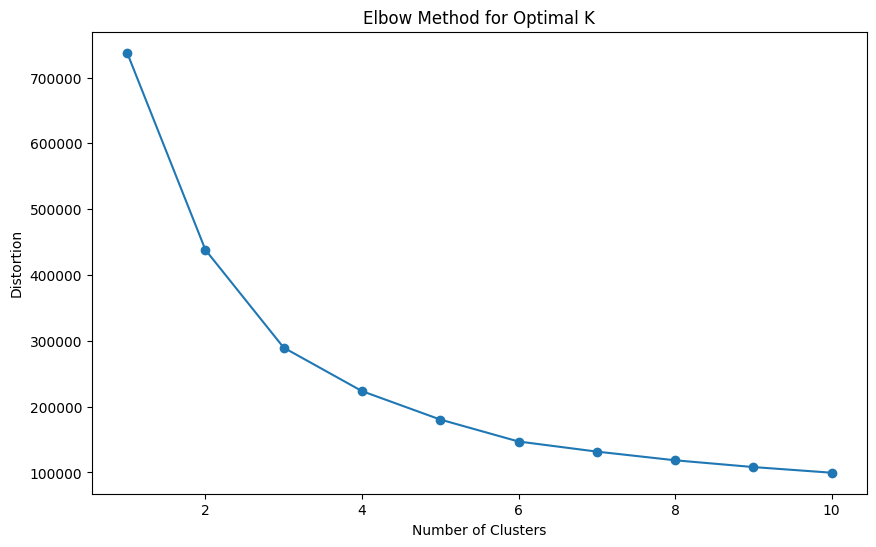

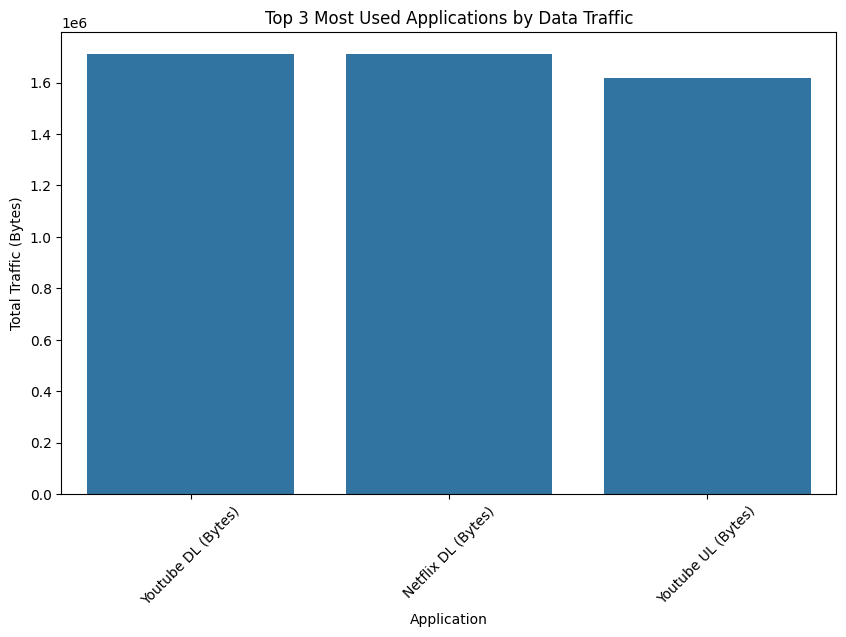

In [9]:
telegram_engagement_analysis = TelecomEngagementAnalysis(cleaned_df)

# Perform analysis
agg_data = telegram_engagement_analysis.aggregate_metrics_by_customer()
top_customers = telegram_engagement_analysis.top_customers_by_metric('Total DL (Bytes)')
normalized_data = telegram_engagement_analysis.normalize_metrics()
clustered_data = telegram_engagement_analysis.k_means_clustering()
cluster_stats = telegram_engagement_analysis.compute_cluster_statistics()
telegram_engagement_analysis.elbow_method()
top_youtube_users = telegram_engagement_analysis.top_users_by_application('Youtube DL (Bytes)')
telegram_engagement_analysis.plot_top_applications()
